<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Теперь-сравним-средние-показатели-общих-данных-и-данных-об-объявлениях-в-центре:" data-toc-modified-id="Теперь-сравним-средние-показатели-общих-данных-и-данных-об-объявлениях-в-центре:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Теперь сравним средние показатели общих данных и данных об объявлениях в центре:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса продажи недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - рассмотреть какие факторы влияют на формирование цены при продаже квартир в Санкт-Петербурге и близлежащих населенных пунктах.

**Ход исследования:**
Известно, что в данных есть пропущенные значения, которые необходимо обработать, поэтому перед началом исследования необходим обзор данных.

**План работы**
* Изучение данных из файла.
* Предобработка данных.
* Новые расчеты.
* Исследовательский анализ.
* Общий вывод.

Данные взяты из `real_estate_data.csv`

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head())
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.describe() # взглянем на разброс значений, чтобы понять где приблизительно можно ждать аномалии

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Аномальное высокие значения есть, но даже они выглядят реалистично, как и среднее отклонение.

In [4]:
df.duplicated().sum() # по крайней мере, очевидных дубликатов нет

0

In [5]:
df.isnull().sum().sort_values()/df.shape[0]*100 # посмотрим на процент пропусков

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

### Вывод: 
Прежде чем приступать к анализу необходимо рассмотреть чем можно (и нужно ли) заменить пропущенные значения в данных. Так например, кол-во пропусов в `locality_name` и `floors_total` меньше 1%, поэтому о них можно не беспокоится, а вот пропуски в некоторых других столбцах могут достигать и 80%, но не факт, что они понадобятся нам далее при анализе.

## Предобработка данных

Прежде чем приступить к предобработке выделим столбцы с пропущенными значениями, которые нам не понадобятся при анализе, и предположим, почему пропуски появились:
* `ponds_around3000` - пропуски обозначают отсутствие водоемов в радиусе 3км.
* `parks_around3000` - нет парков в радиусе 3км, либо квартира загородом.
* `airports_nearest` - ближайший аэропорт находится на расстоянии более 3км.
* `balcony` - пропуск означает, что балконов нет.
* `ponds_nearest` - ближайший водоем на расстоянии более 3км.
* `parks_nearest` - ближайший парк на расстоянии более 3км.
* `is_apartment` - пропуск = False

Хоть для анализа они нам не нужны, все равно попробуем найти логичную замену, может в будущем пригодится

In [6]:
df['is_apartment'].value_counts() # посмотрим на уникальные значения

False    2725
True       50
Name: is_apartment, dtype: int64

Скорее всего, когда клиенты не указывают информации о том, явялвяется ли недвижимость апартаментами или нет, значит это **не** апартаменты, заменим пропущеные значения на `false`

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Предположим, что пропуски в `balcony`, `ponds_around3000`, `parks_around3000` указывают на **отсутствие**, тогда заменим пропуски на `0` и заменим тип данных на `int`, все-таки вряд-ли у кого-то может быть только 1.5 балкона или 2.5 парка рядом.

In [8]:
df['balcony'] = df['balcony'].fillna(0).astype(int) 
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Попробуем заменить пропуски в `kitchen_area` и `living_area`. Для этого найдем какую часть, обычно, кухня и жилая площадь занимает по сравнению с общей площадью. Запишем результаты в новые столбцы `kitchen_part` и `living_part`. Затем умножим часть на общую площадь, тем самым найдем площадь кухни и жилой площади в соответствии с общей площадью:

In [9]:
df['part_living'] = df['living_area'] / df['total_area'] # найдем какую часть от общей площади обычно занимает кухня
living_mean = df['part_living'].mean()
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_mean).round() #заменим пропуски на среднее значение

# то же самое сделаем с кухней:

df['part_kitchen'] = df['kitchen_area'] / df['total_area']
kitchen_mean = df['part_kitchen'].mean()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_mean).round() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

`part_living` и `part_kitchen` заполнились не до конца, поскольку до заполнения пропусков эти самые пропуски не позволили сделать вычисления. Теперь когда пропуски мы заполнили, можно просто еще раз запустить вычисление `part_living` и `part_kitchen`:

In [10]:
df['part_living'] = df['living_area'] / df['total_area'] 
# то же самое сделаем с кухней:
df['part_kitchen'] = df['kitchen_area'] / df['total_area']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

`ceiling_height` медианой или средним значением не заменить, это исказит данные, у высоты потолка есть фиксированные рамки, поэтому пропуски лучше оставить как есть.

Пропуски есть и в `floors_total`, легко предположить что такие пропуски означают, что всего этажей - `1`, также заменим тип данных на `int`, кол-во этажей всегда целое число:


In [11]:
df['floors_total'] = df['floors_total'].fillna(1).astype(int)

Данные в `first_day_exposition` переведем в дату:

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

* Пропуски в `ponds_nearest`, `parks_nearest`, `airport_nearest`, `cityCenters_nearest` - очевидно указывают на то, что данных объектов в близи нет, поэтому их не нужно ничем заполнять.
* Пропусков в `locality_name` меньше процента, да и заполнять их с имеющимися данными трудоемко, поэтому мы их оставим, они не повлияют на результат.
* `ceiling_height` медианой или средним значением не заменить, это исказит данные, у высоты потолка есть фиксированные рамки, поэтому пропуски лучше оставить как есть.
* Пропуски в `days_exposition` могут указывать на то, что недвижимость все еще продаётся. (можно найти замену с помощью `first_day_exposition`, но нужна точка "сегодняшнего дня", в зависимости от нее, данные  в `days_exposition` могут сильно отличаться, поэтому я оставлю все как есть, чтобы не исказить данные)

###  Вывод:

Мы заполнили пропуски там, где это необходимо, и вместе с тем создали 2 новых столбца `living_part` и `kitchen_part` - соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Расчёты и добавление результатов в таблицу

Найдем среднуюю цену за кв.метр и добавим ее в `m2_price`, переведем тип данных в целые числа:

In [13]:
df['m2_price'] = df['last_price'] / df['total_area']
df['m2_price'] = df['m2_price'].astype(int)

Добавим новые столбцы `exposition_day`, `exposition_month`, `exposition_year`, в которых отдельно сохраним день, месяц, год продажи соответственно:

In [14]:
df['exposition_day'] = df['first_day_exposition'].dt.strftime("%A")
df['exposition_month'] = df['first_day_exposition'].dt.strftime("%B")
df['exposition_year'] = df['first_day_exposition'].dt.year
df.head(5) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,part_living,part_kitchen,m2_price,exposition_day,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,0.472222,0.231481,120370,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,19.0,1,False,...,NaN,0,NaN,81.0,0.470297,0.272277,82920,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.0,4,False,...,90.0,2,574.0,558.0,0.607143,0.142857,92785,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.0,9,False,...,84.0,3,234.0,424.0,0.566038,0.188679,408176,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,0.320000,0.410000,100000,Tuesday,June,2018


Распределим объявления о продаже по этажам: *первый*, *последний*, *другой* в столбце `floor_category`:

In [15]:
def floor_count(row):
    floor = row['floor']
    if floor == 1:
        return 'первый' # если этаж = 1, значит он первый
    if floor == row['floors_total']:
        return 'последний' # если этаж = общему кол-ву этажей, значит он последний
    return 'другой'



df['floor_category'] = df.apply(floor_count, axis=1) # применим функцию к df
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,part_living,part_kitchen,m2_price,exposition_day,exposition_month,exposition_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,0.472222,0.231481,120370,Thursday,March,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,19.0,1,False,...,0,NaN,81.0,0.470297,0.272277,82920,Tuesday,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.0,4,False,...,2,574.0,558.0,0.607143,0.142857,92785,Thursday,August,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.0,9,False,...,3,234.0,424.0,0.566038,0.188679,408176,Friday,July,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,0.320000,0.410000,100000,Tuesday,June,2018,другой


### Вывод

Мы добавили несколько новых данных, которые могут пригодится при анализе:
* `m2_price` - цена за кв.м.
* `exposition_day`, `exposition_month`, `exposition_year` - день, месяц, год продажи.
* `floor_category` разпределили объявления по этажам: первый, последний, другой.

## Исследовательский анализ данных

Построим гистограммы для `total_area`, `last_price`, `rooms`, `ceiling_height`, чтобы посмотреть как распределены значения. Заодно вызовем `describe()`, таким образом у нас будут текстовые данные, которые мы для наглядности визуализируем:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

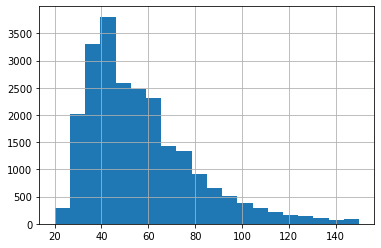

In [16]:
print(df['total_area'].describe()) # Общая площадь
df['total_area'].hist(bins=20, range=(20, 150))

Судя по графику, больше всего объявлений о продаже недвижимостью площадью 30-60 кв.м. Если сузить - квартир 40-45 кв.м. было больше всего в продаже. После 80 кв.м кол-во объявлений неуклонно, но постепенно падает.   

(0.0, 1000.0)

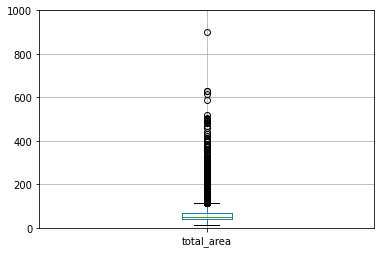

In [17]:
df.boxplot('total_area')
plt.ylim(0, 1000)

На графике видно, что разброс нормальных значений начинается с 20кв.м и заканчивается на 120 кв.м, но много значений и за пределами разброса. Отбросим только редкие значения:

In [18]:
df = df.query('total_area>=20 and total_area<=500')

count    2.366500e+04
mean     6.498059e+06
std      1.028711e+07
min      1.219000e+04
25%      3.425000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

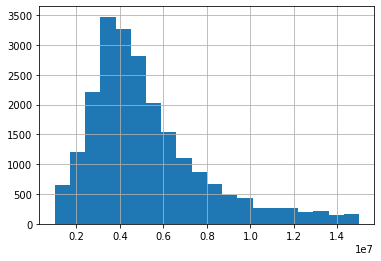

In [19]:
print(df['last_price'].describe()) # Цена
df['last_price'].hist(bins=20, range=(1_000_000,15_000_000)) # сразу срежем редкие низикие и высокие значения

Чаще всего недвижимость продается за 3-6 миллионов, после 6 миллионов начинается постепенное снижение, точно такое же, как и на предыдущем графике, они, в целом, очень похожи. Уже просто на графиках можно видеть сильную корреляцию цены и площади.

Избавимлся от редких значений:

(0.0, 150000000.0)

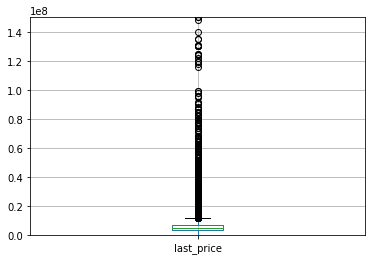

In [20]:
df.boxplot('last_price')
plt.ylim(0, 150_000_000)

За пределами разброса снова много значений, отбросим только редкие: 

In [21]:
df = df.query('last_price<=100_000_000')

count    23632.000000
mean         2.066393
std          1.065198
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

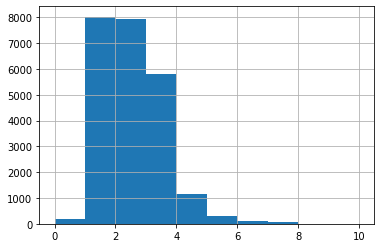

In [22]:
print(df['rooms'].describe()) # Кол-во комнат
df['rooms'].hist(bins=10, range=(0, 10))

Больше всего квартир с 1-2 комнатами, также много объявлений с 3 комнатами, а вот объявлений с 4 комнатами уже в шесть раз меньше.

Избавимся от редких значений:

(0.0, 20.0)

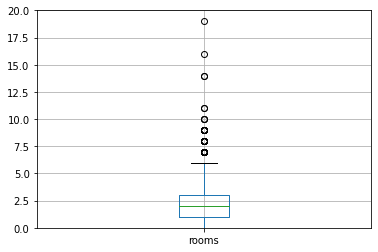

In [23]:
df.boxplot('rooms')
plt.ylim(0, 20)

Видно, что комнат разброс нормальных значений от 0 до 6, значений, которые выходят за эти рамки мало, их можно убрать:


In [24]:
df = df.query('rooms<=6')

count    14402.000000
mean         2.767324
std          1.263627
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

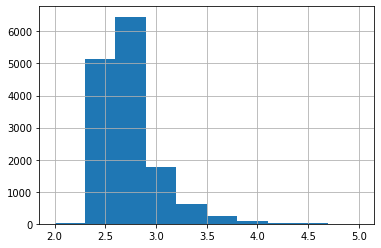

In [25]:
print(df['ceiling_height'].describe()) # Высота потолков
df['ceiling_height'].hist(bins=10, range=(2, 5))

Больше всего вариантов с потолками от 2.5 до 2.7, а вот потолков под 3 метра уже намного меньше, скорее всего, это старые здания ("сталинка", например) или наоборот новое жилье премиум класса.

Избавимся от редких значений:

(0.0, 10.0)

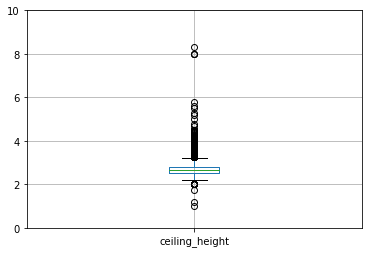

In [26]:
df.boxplot('ceiling_height')
plt.ylim(0, 10)

Хоть, в среднем, потолки от 2 до 3 метров, есть много исключений из этого правила.

In [27]:
df['ceiling_height'].isna().sum()

9150

In [28]:
df = df.query('(ceiling_height < 5 and ceiling_height >=2)  or ceiling_height.isna()')
# избавляемся от редких значений, но сохраняем строки с пропусками, их слишком много, 
# чтобы удалить их без влияния на результат

count    20372.000000
mean       180.472904
std        219.286604
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

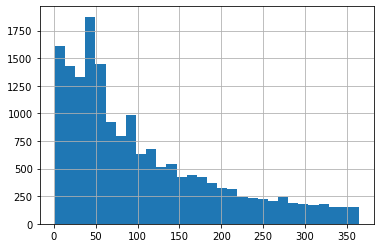

In [29]:
print(df['days_exposition'].describe()) # Сколько дней было размещено
df['days_exposition'].hist(bins=30, range=(1, 365))

Большинство продаж проходят за первые 2 месяца, затем кол-во продаж резко падает чуть ли не в 2 раза. Довольно много продаж происходит в первые 2 недели, можно считать, что продать в рамках 2-х первых недель - это необычайно быстро, но есть и большое кол-во объявлений, которые висят и более полугода. Похоже, что если за первые 2 месяца покупатель не нашелся, то шансы на продажу резко падают.

Взглянем на выбивающиеся значения и избавимся от них:

<AxesSubplot:>

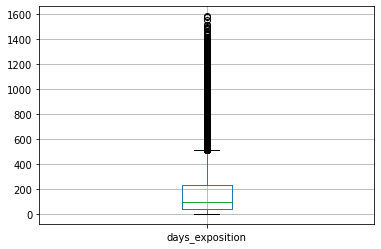

In [30]:
df.boxplot('days_exposition')

Разброс нормальных значений от 0 до 450, но значений за пределами разброса тоже много, их не назвать редкими, поэтому мы уберем значение только выше 1400:

In [31]:
df = df.query('days_exposition < 1400')

<AxesSubplot:>

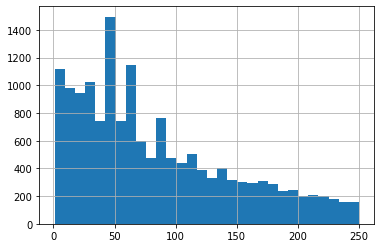

In [32]:
df['days_exposition'].hist(bins=30, range=(1, 250)) # уберем более редкие значения

Если убрать редкие значения, то можно очевиднее наблюдать, что после 40, 60, 90 дней число продаж резко увеличивается, возможно это связанно с тем, что после месяцев ожидания продавцы начинают более активно продвигать свое объявление на сайтах о продаже, газетах и т.п. (либо вообще впервые начинают их продвигать)

Теперь взглянем на корреляцию, чтобы определить какие факторы больше всего влияют на цену.

Посмотрим как на цену влияет общая площадь, число комнат, отдаленость от центра:

In [33]:
price_and_others_df = pd.DataFrame(df, columns=['last_price','total_area','rooms', 'cityCenters_nearest'])

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xl

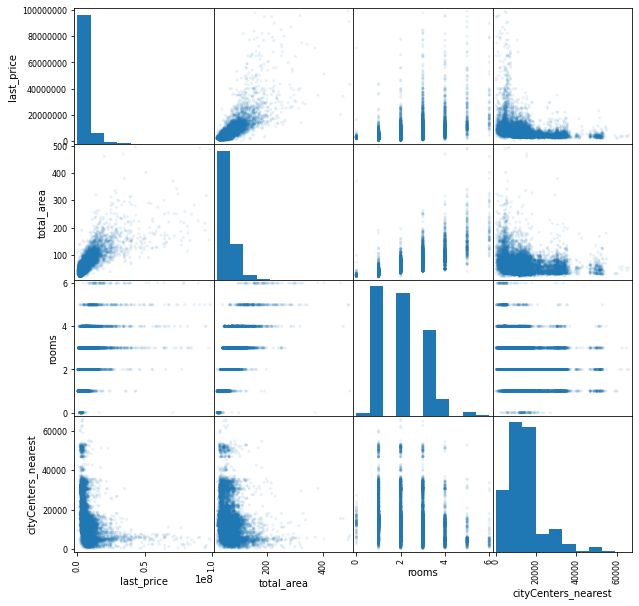

In [34]:
pd.plotting.scatter_matrix(price_and_others_df, figsize=(10, 10), alpha=0.1)

По графикам можно сделать следующие выводы:
* Чем больше общая площадь, тем больше и цена
* Начиная с 3-х комнат, кол-во комнат перестают сильно влияеть на цену
* Чем ближе к центру, тем цена выше

Далее посмотрим как влияет день недели, месяц и год появления объявления на цену:

In [35]:
#для удобства вернем отоброжение дней\месяцев цифрами
df['exposition_month_numeric'] = df['first_day_exposition'].dt.month  
df['exposition_day_numeric'] = df['first_day_exposition'].dt.weekday

<AxesSubplot:xlabel='exposition_day_numeric'>

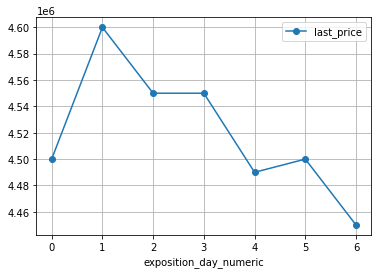

In [36]:
df.pivot_table(index='exposition_day_numeric', values='last_price', aggfunc=('median')).plot(style='o-', grid=True)
# день недели

Похоже, что самые высокие цены появляются в c понедельника на вторник и постепенно снижаются к выходным. Есть предположение, что объявления обновляются именно в понедельник, а первую цену продавец назначает немного завышенной, чтобы в последствии снижать ее, если покупателей не найдется.

<AxesSubplot:xlabel='exposition_month_numeric'>

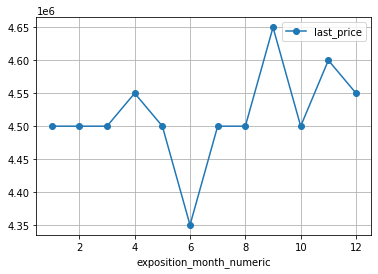

In [37]:
df.pivot_table(index='exposition_month_numeric', values='last_price', aggfunc=('median')).plot(style='o-', grid=True)
# месяц

В целом график должен бы быть довольно стабильным, если бы не одно "но": резкое снижение цены с апреля по июнь и затем возвращение к норме. Возможно это связано с окончанием периода отопления домов и снижению среднего счета за ЖКХ, либо с тем, что перед летним сезоном люди чаще покупают недвижимость загородом, а она дешевле, чем недвижимость в городе. **Затем цена резко возрастает уже в сентябре, что опять же, может быть связанно уже с началом отопительного периода.**

<AxesSubplot:xlabel='exposition_year'>

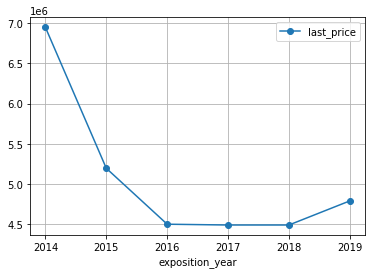

In [38]:
df.pivot_table(index='exposition_year', values='last_price', aggfunc=('median')).plot(style='o-', grid=True)
# год

In [39]:
df['exposition_year'].value_counts()

2017    7855
2018    7520
2016    2699
2015    1095
2019    1074
2014     110
Name: exposition_year, dtype: int64

In [40]:
print((4.5 - 5.4) / 5.4 * 100) # посчитаем проценты
(5.1 - 4.6) / 4.6 * 100

-16.66666666666667


10.869565217391305

Учитывая, что выборка за 2014 маленькая, а сам год для экономики страны был плохим (~~АХАХХАХА теперь кажется не таким уж и плохим~~), будет лучше не учитывать его при анализе. Таким образом:
* Цены с 2015 по 2016 в среднем заметно снизились (на 17%)
* С 2016 по 2018 цены практически не изменились
* с 2018 по 2019 цены выросли (на 11%)

Теперь взглянем как этаж влияет на цену:

<AxesSubplot:xlabel='floor_category'>

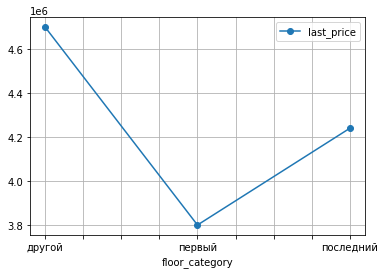

In [41]:
df.pivot_table(index='floor_category', values='last_price', aggfunc=('median')).plot(style='o-', grid=True)

Самым предпочтительным является вариант между первым и последним этажем, первый этаж - самый "дешевый"

Выделим 10 населеных пунктов с наибольшим количеством объявлений:

In [42]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      13502
посёлок Мурино         515
посёлок Шушары         407
Всеволожск             338
Колпино                307
Пушкин                 303
посёлок Парголово      300
деревня Кудрово        299
Гатчина                267
Выборг                 208
Name: locality_name, dtype: int64

Найдем среднюю цену за кв.метр сначала для каждого населеного пункта, а затем возьмем срез нужных нам населеных пунктов.

In [43]:
df_region = df.pivot_table(index='locality_name', values='m2_price', aggfunc=('median'))
region_needed = df['locality_name'].value_counts().head(10).index.to_list() 


# чтобы не писать отдельно список городов, 
# возьмем индексы из 'value_counts' и переведем их в список
# затем этот список передадим 'query()', чтобы получить нужный срез


df_region.query('locality_name == @region_needed').sort_values('m2_price', ascending=False)

,m2_price
locality_name,
Санкт-Петербург,102981.5
Пушкин,97625.0
деревня Кудрово,91860.0
посёлок Парголово,91387.0
посёлок Мурино,86111.0
посёлок Шушары,76125.0
Колпино,73913.0
Гатчина,67187.0
Всеволожск,65789.0


Самый дорогой кв.метр, ожидаемо, в Петербурге, а самый дешевый в Выборге

Теперь попробуем предположить с какого километра начинается центр Петербурга, чтобы затем создать датафрей с данными об объявлениях о продаже недвижимости в центре города и сравнить их с общими данными.

In [44]:
df['cityCenters_nearest'] = (df['cityCenters_nearest'] / 1000).round() # переведем метры в км
df_saint = df.query('locality_name == "Санкт-Петербург"') # берем срез нужного нам Питера 

Посмотрим с какого километра средняя цена сильно возрастает - это и будет начало центра

<AxesSubplot:xlabel='cityCenters_nearest'>

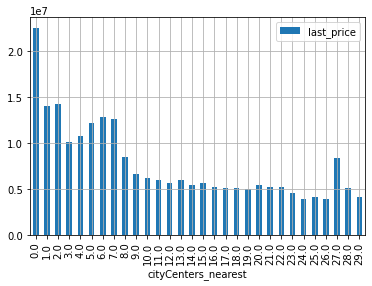

In [45]:
df_saint.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, kind='bar')

Условно можно отчертить центр седьмым километром, возьмем объявления в центре:


In [46]:
df_saint_center = df_saint.query('cityCenters_nearest <= 7')
len(df_saint_center)

2841

### Теперь сравним средние показатели общих данных и данных об объявлениях в центре:


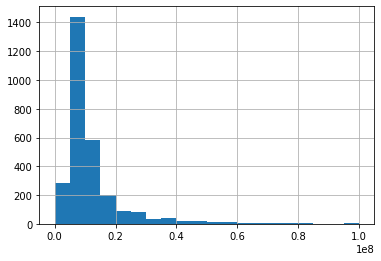

<AxesSubplot:>

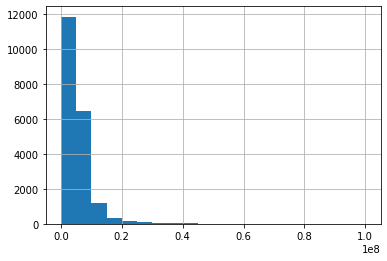

In [47]:
df_saint_center['last_price'].hist(bins=20, range=(0, 100_000_000)) # цена
plt.show()
df['last_price'].hist(bins=20, range=(0, 100_000_000))

Похоже, большинство цен в центре, по сравнению с общими данными, выше на 5 млн. Также видно, что, в процентом соотношении, более дорогой недвижимости в центре больше.

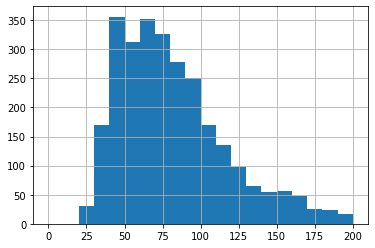

<AxesSubplot:>

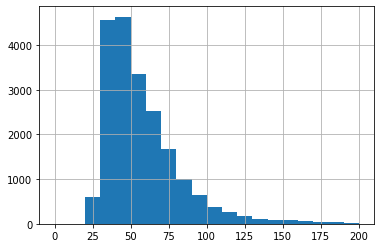

In [48]:
df_saint_center['total_area'].hist(bins=20, range=(0, 200)) # общая площадь
plt.show()
df['total_area'].hist(bins=20, range=(0,200))

Если средняя квартира в общих данных - 30-60кв.метров, то в центре 40 - 100 кв.метров, также квартиры больше 100 метров чаще встречаюттся в центре.

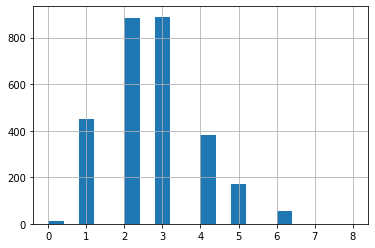

<AxesSubplot:>

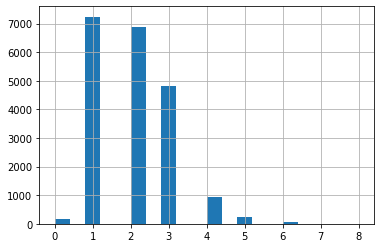

In [49]:
df_saint_center['rooms'].hist(bins=20, range=(0, 8)) # число комнат
plt.show()
df['rooms'].hist(bins=20, range=(0,8))

В центре намного меньше однокомнатных квартиру, а вот 3-х комнатных большинство, а также часто встречаются и 4-х комнатные (так же часто как и однокомнатные).

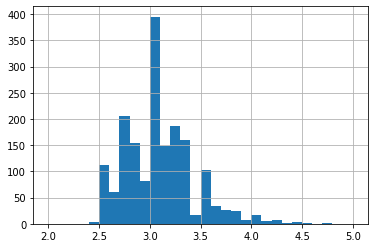

<AxesSubplot:>

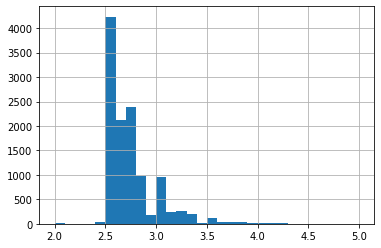

In [50]:
df_saint_center['ceiling_height'].hist(bins=30, range=(2, 5)) # высота потолков
plt.show()
df['ceiling_height'].hist(bins=30, range=(2,5))

Если в общей выборке больше всего вариантов с потолками от 2.5 - 2.7м., то в центре, в среднем, потолки выше, большинство квартир с потолками от 3 - 3.4м. Выглядит логично, учитывая, что в центре сохранилась старая застройка, а если и строится что-то новое, то премиум класса с высокими потолками.

Поближе взглянем на то, что влияет на цену уже не в общей выборке, а именно в центре:

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xl

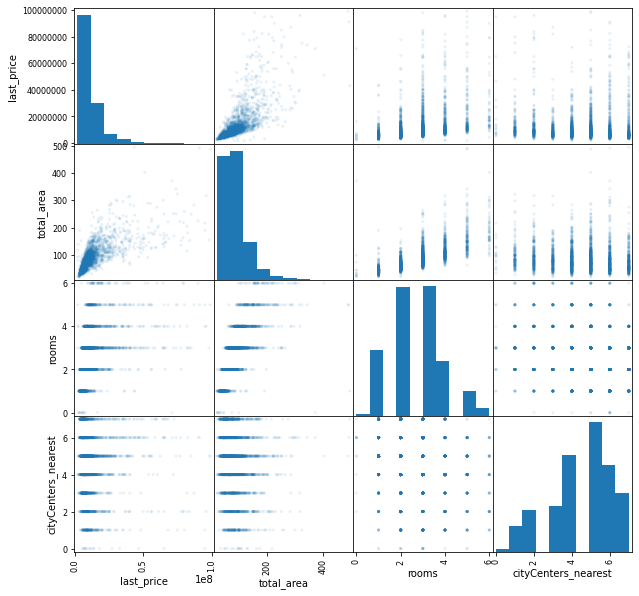

In [51]:
price_in_center_df = pd.DataFrame(df_saint_center, columns=
                                    ['last_price','total_area','rooms', 'cityCenters_nearest'])
pd.plotting.scatter_matrix(price_in_center_df, figsize=(10, 10), alpha=0.1)

Какие выводы можно сделать по графикам, в центре:
* Чем больше общая площадь, тем выше цена
* После 3-х комнат, увеличение кол-ва комнат может наоборот снизить цену на жилье
* Похоже, что люди хотят жить в центре, но не в самом центре. Цена в 0-1км от центра обычно ниже, чем цена за жилье в 4-6км от центра.

In [52]:
df_saint_center['last_price'].describe()

count    2.841000e+03
mean     1.218672e+07
std      1.147224e+07
min      1.600000e+06
25%      6.400000e+06
50%      8.600000e+06
75%      1.290000e+07
max      9.900000e+07
Name: last_price, dtype: float64

Смотреть на зависимость конкретной даты размещения объявления о продаже на цену довольно бессмысленно, поскольку выборка по центру небольшая, а разброс цен высокий, будет много аномально высоких значений обесценивающих график. А вот сравнить как средняя цена менялась по годам в центральной части и в целом может быть полезным

<AxesSubplot:xlabel='exposition_year'>

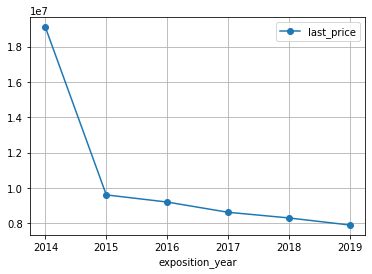

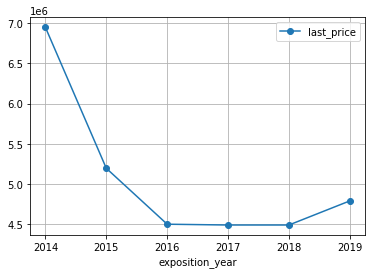

In [53]:
df_saint_center.pivot_table(index='exposition_year', values='last_price', aggfunc=('median')).plot(style='o-', grid=True)
df.pivot_table(index='exposition_year', values='last_price', aggfunc=('median')).plot(style='o-', grid=True)

Графики немного отличаются, если в центре цена с 2015 постепенно падала, то цена из общей выборки падала только с 2015 по 2016, и даже выросла с 2018 по 2019. 

### Вывод:
Общие данные:
* Средняя квартира 30-60 кв.м.
* Средняя цена 3-6 млн.
* Больше всего квартир с 1-2 комнатами.
* Средняя высота потолков 2.5-2.7 метра.
* Большинство продаж за первые 2 месяца, после 2-х месяцев шансы на продажу резко снижаются.
* На цену сильнее всего влиет общая площадь и число комнта. Также важную роль играет этаж.
* Самая высокая цена за квадратный метр из всей выборки - в Санкт-Петербурге.

После сравнения общих данных и данных по центру можно выделить несколько отличий:
* Квартиры в центре зачастую больше по площади (40-100 кв.м. против 30-60 кв.м.)
* В центре реже встречаются однокомнатные квартиры, но чаще 4-х комнтаные и больше
* В центре выше потолки
* На цену так же больше всего влияет общая площадь, но совершенно нивелируется влияение фактора отдаленности от центра.


## Общий вывод

После проведения анализа можно выделить несколько факторов, которые оказывают наибольшее влияние на цену:
* Общая площадь
* Число комнат
* Этаж
* Регион
* Отдаленость от центра (но не для недвижимости, которая в центре)
